In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

data = pd.read_excel('/content/drive/MyDrive/case_study.xlsx', parse_dates=True)

In [ ]:
data.head()

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER


In [ ]:
data.count()


SKU         150
ISO_Week    150
Sales       143
Season      150
dtype: int64

In [ ]:
data.shape

(150, 4)

In [ ]:
data.isnull

<bound method DataFrame.isnull of           SKU ISO_Week    Sales  Season
0    ProductA  2018-01      0.0  WINTER
1    ProductA  2018-02      0.0  WINTER
2    ProductA  2018-03      0.0  WINTER
3    ProductA  2018-04   6988.0  WINTER
4    ProductA  2018-04   6988.0  WINTER
..        ...      ...      ...     ...
145  ProductC  2018-48  12927.0  AUTUMN
146  ProductC  2018-49  11595.0  WINTER
147  ProductC  2018-50  10061.0  WINTER
148  ProductC  2018-51  10859.0  WINTER
149  ProductC  2018-52  13093.0  WINTER

[150 rows x 4 columns]>

In [ ]:
data.isnull().sum()

SKU         0
ISO_Week    0
Sales       7
Season      0
dtype: int64

In [ ]:
data1 = data.fillna(data.mean())                             #Imputing missing values(NA) in the dataset
data1

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER
...,...,...,...,...
145,ProductC,2018-48,12927.0,AUTUMN
146,ProductC,2018-49,11595.0,WINTER
147,ProductC,2018-50,10061.0,WINTER
148,ProductC,2018-51,10859.0,WINTER


In [ ]:
data1.head()

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER


In [ ]:
data1.dtypes                                                #Checking the datatypes of columns

SKU          object
ISO_Week     object
Sales       float64
Season       object
dtype: object

In [ ]:
data1['SKU'] = data1['SKU'].astype('category')              #Changing the datatypes from object to category
data1['Sales'] = data1['Sales'].astype('int64')
data1['Season'] = data1['Season'].astype('category')

In [ ]:
data1.dtypes

SKU         category
ISO_Week      object
Sales          int64
Season      category
dtype: object

In [ ]:
data1.drop(data1[data1['Sales']==0].index, inplace = True)    #Removing the columns where the initial sales is 0

In [ ]:
data1.head()

,SKU,ISO_Week,Sales,Season
3,ProductA,2018-04,6988,WINTER
4,ProductA,2018-04,6988,WINTER
5,ProductA,2018-05,6743,WINTER
6,ProductA,2018-06,4112,WINTER
7,ProductA,2018-07,5732,WINTER


In [ ]:
data1.drop_duplicates(keep='first',inplace=True)                   #Removing duplicates in the data

In [ ]:
data1.describe

<bound method NDFrame.describe of           SKU ISO_Week  Sales  Season
3    ProductA  2018-04   6988  WINTER
5    ProductA  2018-05   6743  WINTER
6    ProductA  2018-06   4112  WINTER
7    ProductA  2018-07   5732  WINTER
8    ProductA  2018-08   5279  WINTER
..        ...      ...    ...     ...
145  ProductC  2018-48  12927  AUTUMN
146  ProductC  2018-49  11595  WINTER
147  ProductC  2018-50  10061  WINTER
148  ProductC  2018-51  10859  WINTER
149  ProductC  2018-52  13093  WINTER

[126 rows x 4 columns]>

#Removing Outlier in Data

In [ ]:
Q1 = data1.Sales.quantile(0.25)
Q3 = data1.Sales.quantile(0.75)
Q1, Q3

(484.0, 10402.0)

In [ ]:
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-14393.0, 25279.0)

In [ ]:
data1[(data1.Sales<lower_limit)|(data1.Sales>upper_limit)]

,SKU,ISO_Week,Sales,Season
127,ProductC,2018-30,52524,SUMMER


In [ ]:
 #Storing the data without Outlier in a separate df, which is prep_data
 
prep_data = data1[(data1.Sales>lower_limit)&(data1.Sales<upper_limit)]     
prep_data

,SKU,ISO_Week,Sales,Season
3,ProductA,2018-04,6988,WINTER
5,ProductA,2018-05,6743,WINTER
6,ProductA,2018-06,4112,WINTER
7,ProductA,2018-07,5732,WINTER
8,ProductA,2018-08,5279,WINTER
...,...,...,...,...
145,ProductC,2018-48,12927,AUTUMN
146,ProductC,2018-49,11595,WINTER
147,ProductC,2018-50,10061,WINTER
148,ProductC,2018-51,10859,WINTER


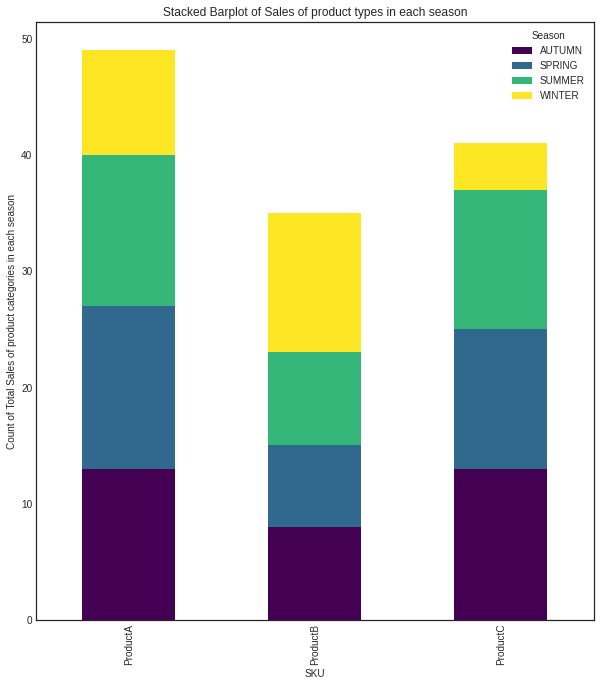

In [ ]:
## stackbar to see count of Sales with respect to each product categories

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
city_cluster = prep_data.groupby(['SKU','Season']).Sales.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(10,11),  grid=False)
plt.title('Stacked Barplot of Sales of product types in each season')
plt.ylabel('Count of Total Sales of product categories in each season')
plt.show()

In [ ]:
data1 = data1.replace('2018-', '', regex=True).astype(object)

In [ ]:
data1.head()

,SKU,ISO_Week,Sales,Season
3,ProductA,04,6988,WINTER
5,ProductA,05,6743,WINTER
6,ProductA,06,4112,WINTER
7,ProductA,07,5732,WINTER
8,ProductA,08,5279,WINTER


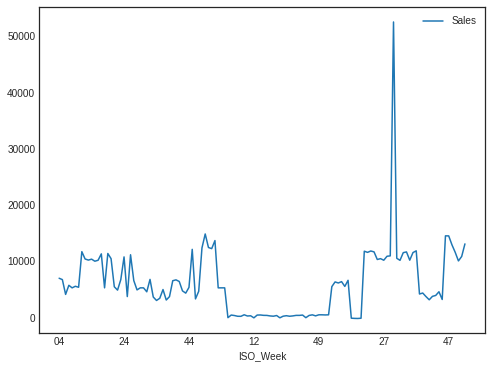

In [ ]:
data1.plot(kind='line',x='ISO_Week',y='Sales',figsize=(8,6))        ## line graph with repect to ISO_Week and Sales Data

In [ ]:
product_categories = data1.groupby(data1.SKU)                      #Dividing the dataset into different subgroups based on Product Category A
ProductA = product_categories.get_group("ProductA")
print(ProductA)

         SKU ISO_Week  Sales  Season
3   ProductA       04   6988  WINTER
5   ProductA       05   6743  WINTER
6   ProductA       06   4112  WINTER
7   ProductA       07   5732  WINTER
8   ProductA       08   5279  WINTER
9   ProductA       09   5559  SPRING
10  ProductA       10   5381  SPRING
11  ProductA       11  11709  SPRING
12  ProductA       12  10410  SPRING
13  ProductA       13  10211  SPRING
14  ProductA       14  10378  SPRING
15  ProductA       15  10012  SPRING
17  ProductA       16  10178  SPRING
18  ProductA       17  11316  SPRING
19  ProductA       18   5279  SPRING
20  ProductA       19  11384  SPRING
21  ProductA       20  10470  SPRING
22  ProductA       21   5471  SPRING
23  ProductA       22   4874  SPRING
24  ProductA       23   6746  SUMMER
25  ProductA       24  10777  SUMMER
26  ProductA       25   3730  SUMMER
27  ProductA       26  11159  SUMMER
28  ProductA       27   6568  SUMMER
29  ProductA       28   4915  SUMMER
30  ProductA       29   5279  SUMMER
3

In [ ]:
product_categories = data1.groupby(data1.SKU)                      #Dividing the dataset into different subgroups based on Product Category B
ProductB = product_categories.get_group("ProductB")
print(ProductB)

          SKU ISO_Week Sales  Season
54   ProductB       01  5279  WINTER
55   ProductB       02  5279  WINTER
56   ProductB       03  5279  WINTER
57   ProductB       04   -23  WINTER
58   ProductB       05   446  WINTER
59   ProductB       06   361  WINTER
60   ProductB       07   229  WINTER
61   ProductB       08   219  WINTER
63   ProductB       09   495  SPRING
64   ProductB       10   278  SPRING
65   ProductB       11   316  SPRING
66   ProductB       12   -50  SPRING
74   ProductB       20   442  SPRING
75   ProductB       21   459  SPRING
76   ProductB       22   392  SPRING
77   ProductB       23   381  SUMMER
78   ProductB       24   288  SUMMER
79   ProductB       25   240  SUMMER
80   ProductB       26   361  SUMMER
83   ProductB       29   -45  SUMMER
87   ProductB       33   241  SUMMER
88   ProductB       34   328  SUMMER
89   ProductB       35   233  SUMMER
90   ProductB       36   293  AUTUMN
91   ProductB       37   387  AUTUMN
92   ProductB       38   385  AUTUMN
9

In [ ]:
product_categories = data1.groupby(data1.SKU)                      #Dividing the dataset into different subgroups based on Product Category C
ProductC = product_categories.get_group("ProductC")
print(ProductC)

          SKU ISO_Week  Sales  Season
107  ProductC       11   5495  SPRING
108  ProductC       12   6330  SPRING
109  ProductC       13   6144  SPRING
110  ProductC       14   6383  SPRING
111  ProductC       15   5533  SPRING
113  ProductC       16   6619  SPRING
114  ProductC       17   -111  SPRING
115  ProductC       18   -149  SPRING
116  ProductC       19   -163  SPRING
117  ProductC       20   -119  SPRING
118  ProductC       21  11793  SPRING
119  ProductC       22  11583  SPRING
120  ProductC       23  11828  SUMMER
121  ProductC       24  11672  SUMMER
122  ProductC       25  10317  SUMMER
123  ProductC       26  10468  SUMMER
124  ProductC       27  10186  SUMMER
125  ProductC       28  10892  SUMMER
126  ProductC       29  10961  SUMMER
127  ProductC       30  52524  SUMMER
128  ProductC       31  10532  SUMMER
129  ProductC       32  10168  SUMMER
130  ProductC       33  11533  SUMMER
131  ProductC       34  11663  SUMMER
132  ProductC       35  10197  SUMMER
133  Product

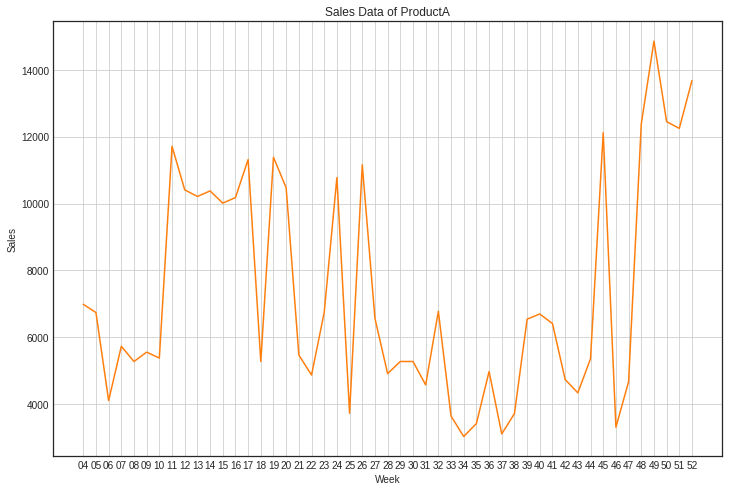

In [ ]:
##Plotting the Sales Data of ProductA
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ProductA.ISO_Week, ProductA.Sales, color='tab:orange', label='Windspeed')
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_title('Sales Data of ProductA')
ax.grid(True)


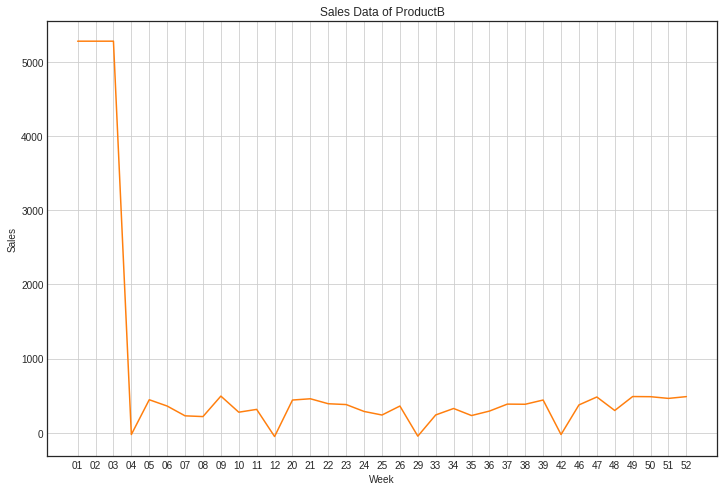

In [ ]:
##Plotting the Sales Data of ProductC
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ProductB.ISO_Week, ProductB.Sales, color='tab:orange', label='Windspeed')
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_title('Sales Data of ProductB')
ax.grid(True)

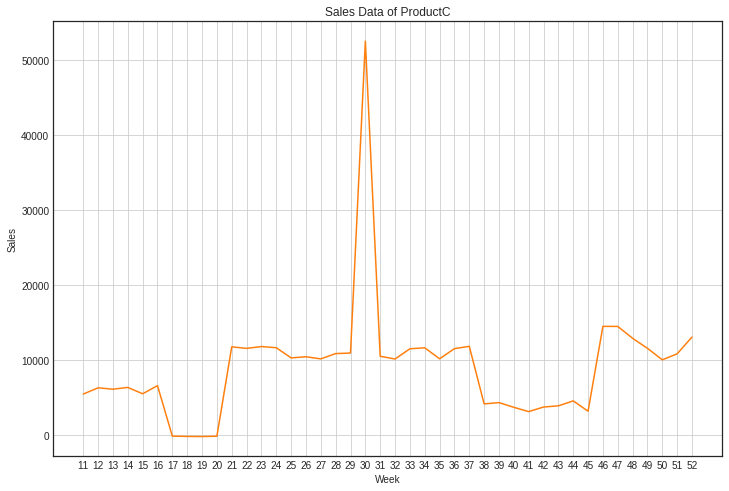

In [ ]:
##Plotting the Sales Data of ProductC
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ProductC.ISO_Week, ProductC.Sales, color='tab:orange', label='Windspeed')
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_title('Sales Data of ProductC')
ax.grid(True)

#Checking Stationarity in the data

In [ ]:
#Checking Stationarity for ProductA

from statsmodels.tsa.stattools import adfuller
X = ProductA['Sales'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -1.441873
p-value: 0.562045
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
#Checking Stationarity for ProductB

from statsmodels.tsa.stattools import adfuller
X = ProductB['Sales'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.601870
p-value: 0.482654
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
#Checking Stationarity for ProductC

X = ProductC['Sales'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.742343
p-value: 0.000070
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary


Converting Non-Stationary data to Stationary in ProductA, ProductB

In [ ]:
ProductA_new = pd.DataFrame(ProductA['Sales'])
ProductA_new['Differencing']=list((ProductA['Sales']-ProductA['Sales'].shift(1).fillna(method='bfill')))

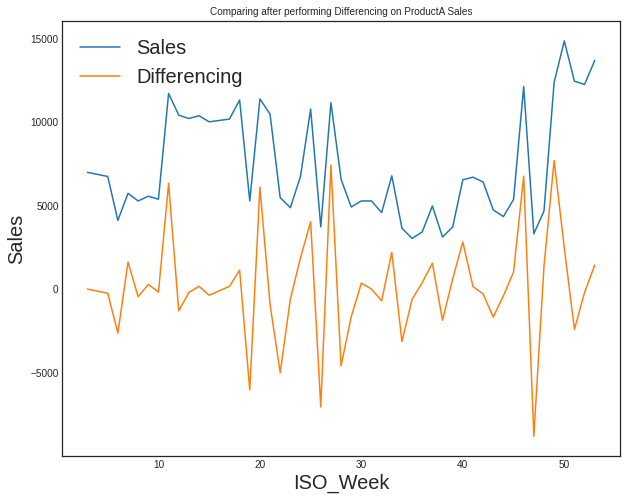

In [ ]:
ProductA_new.plot(figsize=(10, 8))
plt.title('Comparing after performing Differencing on ProductA Sales', fontsize=10)
plt.xlabel("ISO_Week", fontsize=20)
plt.ylabel("Sales", fontsize=20)
plt.legend(fontsize=20, loc=2)
plt.show()


In [ ]:
ProductB_new = pd.DataFrame(ProductB['Sales'])
ProductB_new['Differencing']=list((ProductB['Sales']-ProductB_new['Sales'].shift(1).fillna(method='bfill')))

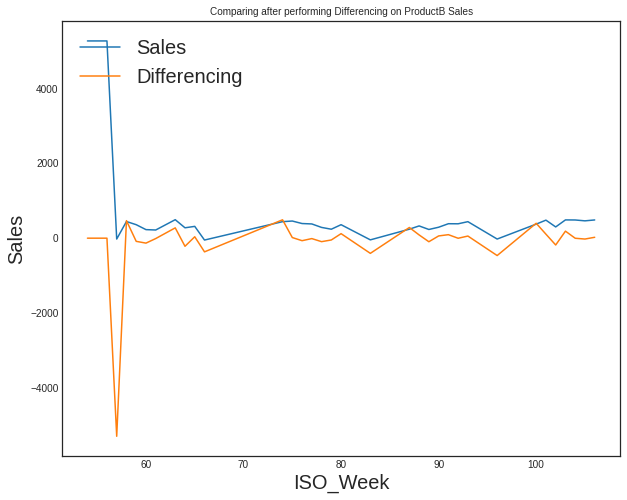

In [ ]:
ProductB_new.plot(figsize=(10, 8))
plt.title('Comparing after performing Differencing on ProductB Sales', fontsize=10)
plt.xlabel("ISO_Week", fontsize=20)
plt.ylabel("Sales", fontsize=20)
plt.legend(fontsize=20, loc=2)
plt.show()

In [ ]:
#ACF PLOT OF ProductA_new
from pandas.plotting import autocorrelation_plot

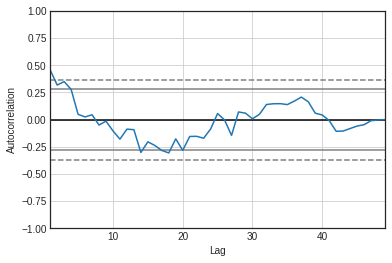

In [ ]:
autocorrelation_plot(ProductA_new['Sales'])

#pvalue can be 1

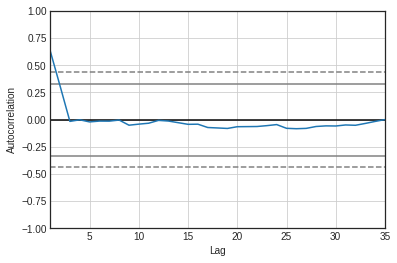

In [ ]:
#ACF PLOT OF ProductB_new
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ProductB_new['Sales'])

#p value can be 1

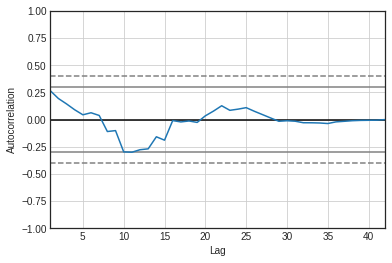

In [ ]:
#ACF PLOT OF ProductC
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ProductC['Sales'])

#P value can be 7

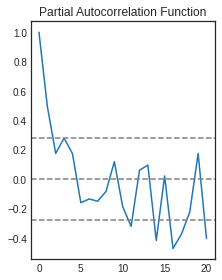

In [ ]:
#PACF Plot of ProductA_new
#Plot PACF:
from statsmodels.tsa.stattools import acf, pacf
lag_pacf = pacf(ProductA_new['Sales'], nlags=20, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ProductA_new['Sales'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ProductA_new['Sales'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#q = 2

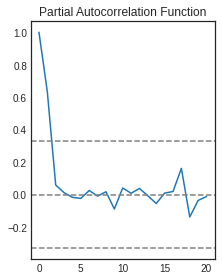

In [ ]:
#PACF Plot of ProductB_new
#Plot PACF:
from statsmodels.tsa.stattools import acf, pacf
lag_pacf = pacf(ProductB_new['Sales'], nlags=20, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ProductB_new['Sales'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ProductB_new['Sales'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# q=3

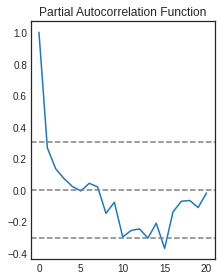

In [ ]:
#PACF Plot of ProductC

from statsmodels.tsa.stattools import acf, pacf
lag_pacf = pacf(ProductC['Sales'], nlags=20, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ProductC['Sales'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ProductC['Sales'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#q = 1

Splitting Train and Test Data 

In [ ]:
#Splitting Train and Test Data from Product A Manually without using sklearn

In [ ]:
Train_data_ProdA = ProductA.iloc[:39]        #Data upto week 43 of ProductA
print(Train_data_ProdA)

         SKU ISO_Week  Sales
3   ProductA       04   6988
5   ProductA       05   6743
6   ProductA       06   4112
7   ProductA       07   5732
8   ProductA       08   5279
9   ProductA       09   5559
10  ProductA       10   5381
11  ProductA       11  11709
12  ProductA       12  10410
13  ProductA       13  10211
14  ProductA       14  10378
15  ProductA       15  10012
17  ProductA       16  10178
18  ProductA       17  11316
19  ProductA       18   5279
20  ProductA       19  11384
21  ProductA       20  10470
22  ProductA       21   5471
23  ProductA       22   4874
24  ProductA       23   6746
25  ProductA       24  10777
26  ProductA       25   3730
27  ProductA       26  11159
28  ProductA       27   6568
29  ProductA       28   4915
30  ProductA       29   5279
31  ProductA       30   5279
32  ProductA       31   4579
33  ProductA       32   6780
34  ProductA       33   3648
35  ProductA       34   3036
36  ProductA       35   3425
37  ProductA       36   4979
38  ProductA  

In [ ]:
Test_data_ProdA = ProductA.iloc[39:52]              #Data from week 43 to Week 52 of ProductA
print(Test_data_ProdA)

         SKU ISO_Week  Sales
44  ProductA       43   4341
45  ProductA       44   5363
46  ProductA       45  12120
47  ProductA       46   3314
48  ProductA       47   4673
49  ProductA       48  12376
50  ProductA       49  14853
51  ProductA       50  12447
52  ProductA       51  12247
53  ProductA       52  13679


In [ ]:
#ProductB.drop(['Season'],axis = 1, inplace=True) 
Train_data_ProdB = ProductB.loc[53:96]                   #Data upto week 43 of ProductB
print(Train_data_ProdB)

         SKU ISO_Week Sales
54  ProductB       01  5279
55  ProductB       02  5279
56  ProductB       03  5279
57  ProductB       04   -23
58  ProductB       05   446
59  ProductB       06   361
60  ProductB       07   229
61  ProductB       08   219
63  ProductB       09   495
64  ProductB       10   278
65  ProductB       11   316
66  ProductB       12   -50
74  ProductB       20   442
75  ProductB       21   459
76  ProductB       22   392
77  ProductB       23   381
78  ProductB       24   288
79  ProductB       25   240
80  ProductB       26   361
83  ProductB       29   -45
87  ProductB       33   241
88  ProductB       34   328
89  ProductB       35   233
90  ProductB       36   293
91  ProductB       37   387
92  ProductB       38   385
93  ProductB       39   442
96  ProductB       42   -23


In [ ]:
#ProductB.drop(['Season'],axis = 1, inplace=True) 
Test_data_ProdB = ProductB.loc[100:106]                   #Data upto week 43 of ProductB
print(Test_data_ProdB)

          SKU ISO_Week Sales
100  ProductB       46   376
101  ProductB       47   483
102  ProductB       48   301
103  ProductB       49   489
104  ProductB       50   487
105  ProductB       51   464
106  ProductB       52   488


In [ ]:
ProductC.drop(['Season'],axis = 1, inplace=True) 
Train_data_ProdC = ProductC.loc[107:139]                   #Data upto week 43 of ProductC
print(Train_data_ProdC)

          SKU ISO_Week  Sales
107  ProductC       11   5495
108  ProductC       12   6330
109  ProductC       13   6144
110  ProductC       14   6383
111  ProductC       15   5533
113  ProductC       16   6619
114  ProductC       17   -111
115  ProductC       18   -149
116  ProductC       19   -163
117  ProductC       20   -119
118  ProductC       21  11793
119  ProductC       22  11583
120  ProductC       23  11828
121  ProductC       24  11672
122  ProductC       25  10317
123  ProductC       26  10468
124  ProductC       27  10186
125  ProductC       28  10892
126  ProductC       29  10961
127  ProductC       30  52524
128  ProductC       31  10532
129  ProductC       32  10168
130  ProductC       33  11533
131  ProductC       34  11663
132  ProductC       35  10197
133  ProductC       36  11549
134  ProductC       37  11856
135  ProductC       38   4185
136  ProductC       39   4357
137  ProductC       40   3730
138  ProductC       41   3158
139  ProductC       42   3768


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Test_data_ProdC = ProductC.loc[140:149]                   #Test Data upto week 43 of ProductB
print(Test_data_ProdC)

          SKU ISO_Week  Sales
140  ProductC       43   3929
141  ProductC       44   4588
142  ProductC       45   3212
143  ProductC       46  14521
144  ProductC       47  14510
145  ProductC       48  12927
146  ProductC       49  11595
147  ProductC       50  10061
148  ProductC       51  10859
149  ProductC       52  13093


Applying AR Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ProdA_model = ARIMA(np.asarray(Train_data_ProdA.Sales), order=(1,1,1))     #p=2, q=2, d=1 for ProductA
ProductA_model_fit = ProdA_model.fit()

In [ ]:
ProductA_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -350.220
Method:                       css-mle   S.D. of innovations           2416.804
Date:                Fri, 20 Nov 2020   AIC                            708.439
Time:                        12:20:59   BIC                            714.990
Sample:                             1   HQIC                           710.770
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.5135    155.718     -0.145      0.886    -327.715     282.688
ar.L1.D.y     -0.1189      0.251     -0.474      0.639      -0.611       0.373
ma.L1.D.y     -0.5733      0.212     -2.707      0.010      -0.988      -0.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.4103           +0.0000j            8.4103            0.5000
MA.1            1.7444           +0.0000j            1.7444            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
ProdA_forecast = ProductA_model_fit.forecast(steps = 35)[0]

In [ ]:
ProductA_forecast=ProdA_forecast[:10]  #Forecasted Sales values
ProductA_forecast

array([6013.20692185, 5874.02901393, 5588.01016577, 5661.2184644 ,
       5687.47403983, 5641.33990757, 5622.34419519, 5613.9569848 ,
       5596.91447146, 5579.37040904])

In [ ]:
Test_data_ProdA

,SKU,ISO_Week,Sales
44,ProductA,43,4341
45,ProductA,44,5363
46,ProductA,45,12120
47,ProductA,46,3314
48,ProductA,47,4673
49,ProductA,48,12376
50,ProductA,49,14853
51,ProductA,50,12447
52,ProductA,51,12247
53,ProductA,52,13679


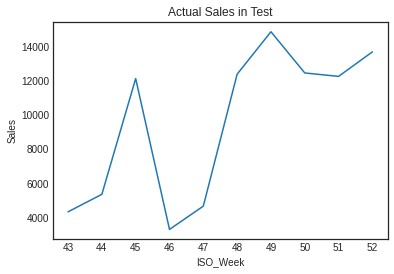

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(Test_data_ProdA['ISO_Week'], Test_data_ProdA['Sales'])
plt.plot()
plt.title('Actual Sales in Test')
plt.xlabel('ISO_Week')
plt.ylabel('Sales')
plt.show()